In [1]:
import numpy as np
import pandas as pd

train=pd.read_csv("bike-sharing-demand/train.csv")
test=pd.read_csv("bike-sharing-demand/test.csv")
submission=pd.read_csv("bike-sharing-demand/sampleSubmission.csv")

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.head() #datetime부터 registered 까지는 예측에 사용할 수 있는 피처, count는 예측해야할 타깃값

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head() #casual과 registered가 빠짐 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 더 효과적인 분석을 위한 피처 엔지니어링

In [8]:
# datatime피처의 데이터타입은 object => 문자열 타입 

In [9]:
print(train["datetime"][100]) #datetime 100번째 원소
print(train["datetime"][100].split()) #공백 기준으로 문자열 나누기
print(train["datetime"][100].split()[0]) #날짜
print(train["datetime"][100].split()[1]) #날짜

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [10]:
print(train["datetime"][100].split()[0]) #날짜
print(train["datetime"][100].split()[0].split("-")) #"-" 기준으로 문자열 나누기
print(train["datetime"][100].split()[0].split("-")[0]) #연도
print(train["datetime"][100].split()[0].split("-")[1]) #월
print(train["datetime"][100].split()[0].split("-")[2]) #일

2011-01-05
['2011', '01', '05']
2011
01
05


In [11]:
print(train["datetime"][100].split()[1])
print(train["datetime"][100].split()[1].split(":")) #":" 기준으로 문자열 나누기
print(train["datetime"][100].split()[1].split(":")[0]) #시간
print(train["datetime"][100].split()[1].split(":")[1]) #분
print(train["datetime"][100].split()[1].split(":")[2]) #초

09:00:00
['09', '00', '00']
09
00
00


In [12]:
train["date"]=train["datetime"].apply(lambda x: x.split()[0]) #날짜피처생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train["year"]=train["datetime"].apply(lambda x:x.split()[0].split('-')[0])
train["month"]=train["datetime"].apply(lambda x:x.split()[0].split('-')[1])
train["day"]=train["datetime"].apply(lambda x:x.split()[0].split('-')[2])

train["hour"]=train["datetime"].apply(lambda x:x.split()[1].split(':')[0])
train["minute"]=train["datetime"].apply(lambda x:x.split()[1].split(':')[1])
train["second"]=train["datetime"].apply(lambda x:x.split()[1].split(':')[2])

In [13]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


In [14]:
# 날짜와 시간(datetime)을 문자열로 출력하려면 strftime
# 날짜와 시간 형식의 문자열을 datetime으로 변환하려면 strptime을 사용 
# datetime.strptime(문자열, 형식)

In [15]:
from datetime import datetime
import calendar #요일피처 생성하기

print(train["date"][100]) #날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) #datetime 타입으로 변경
#정수로 요일변환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
#문자열로 요일반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [16]:
train['weekday']=train['date'].apply(lambda dateString: 
                                     calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

## season과 weather 피처

In [17]:
train['season']=train['season'].map({ 1: 'Spring',
                                      2: 'Summer',
                                      3: 'Fall',
                                      4: 'Winter'})

In [18]:
train['weather']=train['weather'].map({ 1: 'Clear',
                                        2: 'Mist, Few clouds',
                                        3: 'Light Snow, Rain, Thunderstorm',
                                        4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [19]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [20]:
# 세분화된 month피처를 세달씩 묶으면 season 피처와 의미가 같아짐.
# 지나치게 세분화된 피처를 더 큰 분류로 묶으면 성능이 좋아지는 경우가 있음 
#=> season피처만 남기고 month 피처는 제거

# date피처는 추후에 제거. 

## 데이터 시각화

In [21]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

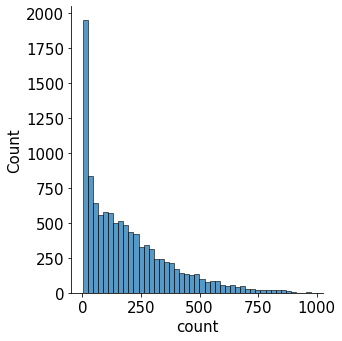

In [22]:
mpl.rc('font', size=15) #폰트크기를 15로 설정
sns.displot(train['count']) #타깃값 분포

분포가 왼쪽으로 많이 편향되어있음. 회귀모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야 하는데,
타깃값 count는 정규분포를 따르지 않음. => 모델링에서 좋은 성능을 기대하기 어려움 

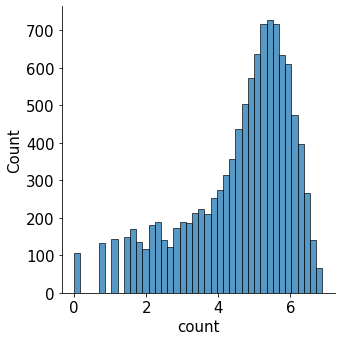

In [23]:
sns.displot(np.log(train["count"]))

변환 전보다 정규분포에 가까워짐, 타깃값을 log로 변환하는것이 더 정확
but, 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야함. 

### 막대 그래프

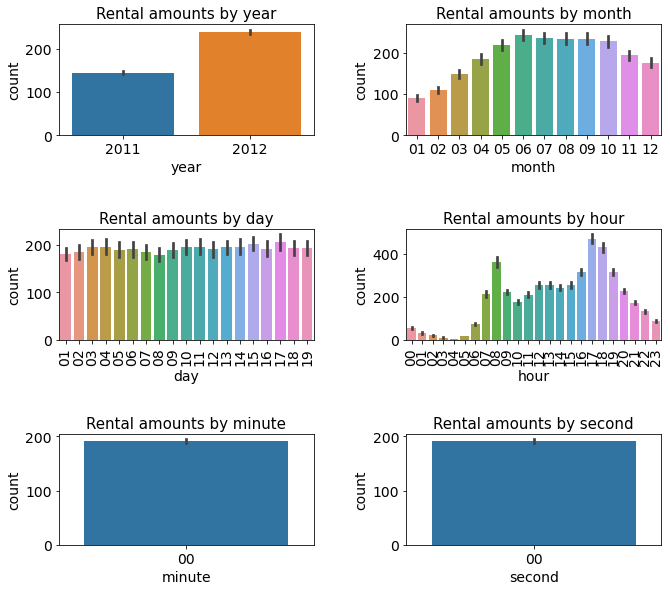

In [24]:
# 스텝 1: m행 n열 Figure준비
mpl.rc('font', size=14) #폰트 크기 설정
mpl.rc('axes', titlesize=15) #각 축의 제목 크기 설정
figure, axes=plt.subplots(nrows=3, ncols=2) #3행 2열 Figure생성
plt.tight_layout() #그래프 사이의 여백확보
figure.set_size_inches(10,9) #전체 figure사이즈를 10*9인치로 설정
# 스텝 2: 각 축의 subplot 할당
# 각 축에 연도, 월, 시간, 분, 초,별 평균 대여 수량막대 그래프 할당

sns.barplot(x="year",y="count",data=train, ax=axes[0,0])
sns.barplot(x="month",y="count",data=train, ax=axes[0,1])
sns.barplot(x="day",y="count",data=train, ax=axes[1,0])
sns.barplot(x="hour",y="count",data=train, ax=axes[1,1])
sns.barplot(x="minute",y="count",data=train, ax=axes[2,0])
sns.barplot(x="second",y="count",data=train, ax=axes[2,1])

# 스텝 3: 세부설정
# 3-1 : 서브플롯에 제목달기
axes[0,0].set(title="Rental amounts by year")
axes[0,1].set(title="Rental amounts by month")
axes[1,0].set(title="Rental amounts by day")
axes[1,1].set(title="Rental amounts by hour")
axes[2,0].set(title="Rental amounts by minute")
axes[2,1].set(title="Rental amounts by second")
#3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1,0].tick_params(axis="x", labelrotation=90)
axes[1,1].tick_params(axis="x", labelrotation=90)

### 박스플롯

범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프 => 계절, 날씨, 공휴일, 근무일(범주형데이터)별 대여수량(수치형 데이터)를 박스플롯으로 그려봄

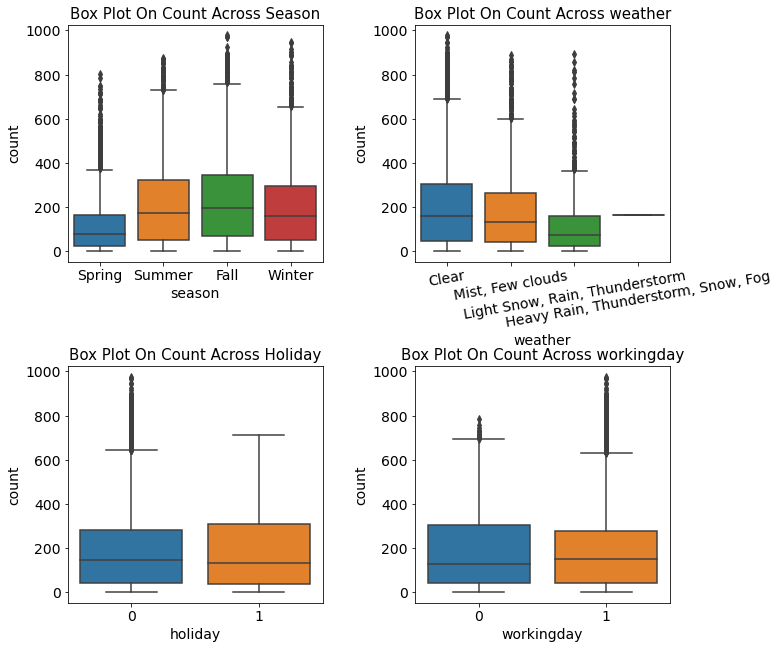

In [25]:
figure, axes=plt.subplots(nrows=2, ncols=2) #3행 2열 Figure생성
plt.tight_layout()
figure.set_size_inches(10,10)

#스텝 2: 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x="season", y='count', data=train, ax=axes[0,0])
sns.boxplot(x="weather", y='count', data=train, ax=axes[0,1])
sns.boxplot(x="holiday", y='count', data=train, ax=axes[1,0])
sns.boxplot(x="workingday", y='count', data=train, ax=axes[1,1])

#스텝 3: 세부설정
#3-1 : 서브플롯에 제목달기
axes[0,0].set(title="Box Plot On Count Across Season")
axes[0,1].set(title="Box Plot On Count Across weather")
axes[1,0].set(title="Box Plot On Count Across Holiday")
axes[1,1].set(title="Box Plot On Count Across workingday")

#3-2 : x축라벨 겹침 해결
axes[0,1].tick_params(axis='x', labelrotation=10)

그래프 1: 대여수량은 봄에 가장 적고, 가을에 가장 많음
그래프 2:날씨 대여 수량은 좋을때 가장 많음 
그래프 3: 공휴일 여부에 따른 대여수량을 나타내는 박스플롯, 공휴일이 아닐때 이상치가 많음 
그래프 4: 근무일 여부에 따른 대여수량을 나타냄. 근무일일때 이상치가 많음 (근무일은 공휴일과 주말을 뺀 나머지)

### 포인트 플롯 : 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 표시

<AxesSubplot:xlabel='hour', ylabel='count'>

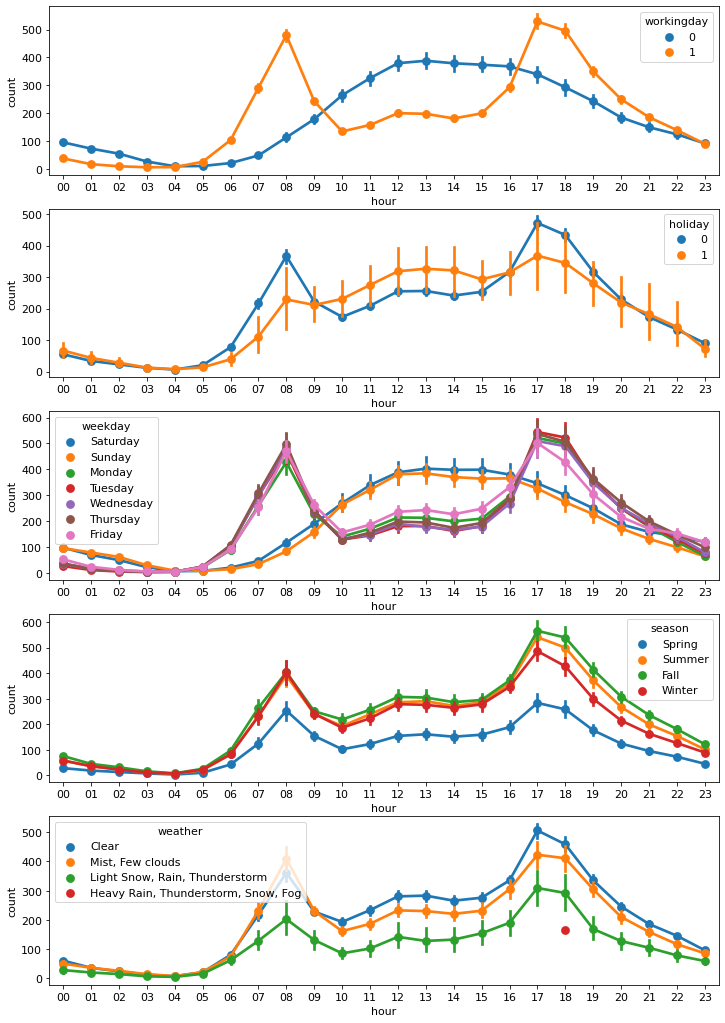

In [26]:
#스텝 1 : m행 n열 Figure준비
mpl.rc('font',size=11)
figure, axes=plt.subplots(nrows=5) #5행 1열
figure.set_size_inches(12,18)

#스텝 2: 서브플롯 할당
#근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

weather==4인 데이터 제거

### 회귀선을 포함한 산점도 그래프 : 수치형 데이터간 상관관계

<AxesSubplot:xlabel='humidity', ylabel='count'>

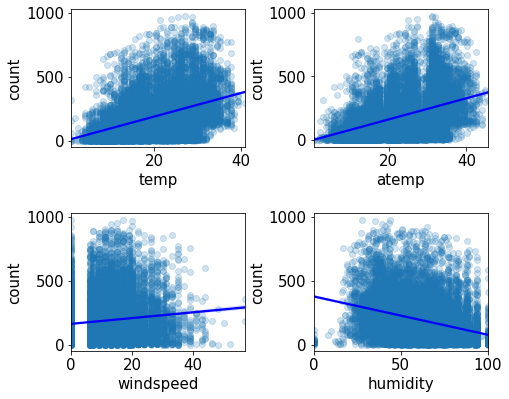

In [27]:
mpl.rc('font',size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) #2행 2열
plt.tight_layout()
figure.set_size_inches(7,6)

#스텝2: 서브플롯 할당
#온도, 체감온도, 풍속, 습도 별 대여수량 산점도 그래프
#{'alpha':0.2} : 투명도 조절, line_kws={'color':'blue'} :회귀선 색상 선택
sns.regplot(x='temp',y='count',data=train, ax=axes[0,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp',y='count',data=train, ax=axes[0,1],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed',y='count',data=train, ax=axes[1,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity',y='count',data=train, ax=axes[1,1],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})                                                

온도와 체감온도가 높을수록 대여수량이 많음
습도는 낮을수록 대여수량이 많음 
windspeed 피처에 결측값이 많음 => 풍속이 0인 데이터가 많음 , 오류로 인해 0으로 기록될 가능성 높음 , 결측값을 다른값으로 대체하거나 windspeed 피처자체를 삭제해야함.

### 히트맵

In [28]:
train[['temp','atemp','humidity','windspeed','count']].corr() #수치형 데이터끼리 어떤 상관관계가 있는지

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<AxesSubplot:>

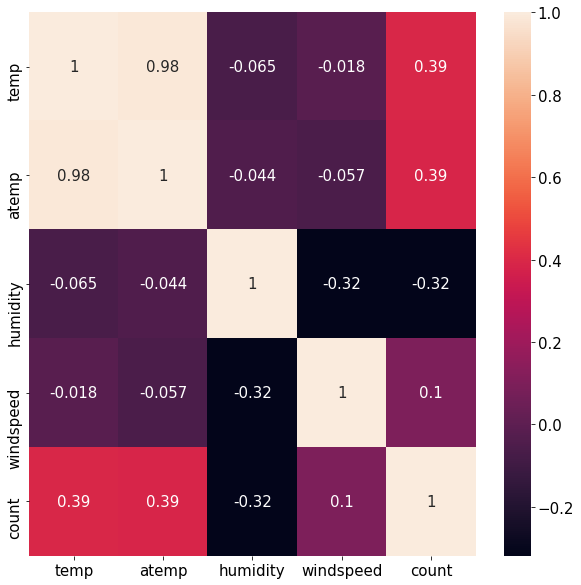

In [29]:
corrMat=train[['temp','atemp','humidity','windspeed','count']].corr() 
fig, ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True) #상관관계 히트맵 그리기


타깃값 count와의 상관관계가 중요
winspeed 피처는 대여수량 예측에 크게 도움을 주지 않음. 성능을 높이기 위해 winspeed는 제거

## 6-4 베이스라인 모델

In [38]:
train=pd.read_csv("bike-sharing-demand/train.csv")
test=pd.read_csv("bike-sharing-demand/test.csv")
submission=pd.read_csv("bike-sharing-demand/sampleSubmission.csv")

## 6-4-1 피쳐 엔지니어링

피처 엔지니어링은 데이터를 변환하는 작업, 보통은 변환을 훈련데이터와 테스트 데이터에 공통으로 반영해야 하기 때문에, 
피쳐 엔지니어링 전에 두 데이터를 합쳤다가 끝나면 도로 나눠줌. 

In [54]:
### 데이터 합치기 전에 훈련데이터에서 이상치 제거 : weather가 4인경우
train=train[train['weather'] != 4] #4가 아닌것들만 넣어라

In [55]:
## 데이터 합치기
all_data_temp=pd.concat([train,test])
all_data_temp #훈련데이터 10886행, 테스트데이터 6493행으로 구성 - weather가 4인 데이터 하나 제거


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [56]:
all_data=pd.concat([train,test],ignore_index=True) #원래 데이터 인덱스 무시하는방법
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [57]:
## 파생피처(변수) 추가
from datetime import datetime

#날짜 피처 생성
all_data['date']=all_data['datetime'].apply(lambda x: x.split()[0])
#연도 피처 생성
all_data['year']=all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
#월 피처 생성
all_data['month']=all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
## day피처는 사용할 필요 없음, 훈련데이터(1~19일 기록), 테스트데이터(20~말일)
#시 피처 생성
all_data['hour']=all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
#분, 초가 모든 기록에서 값이 같음. 사용x

In [58]:
## 필요없는 피처 제거
# casual, registered피처 제거, 
# datetime의 정보와 date는 다른 피처에도 담겨있기에 삭제
# season피처는 month피처와 같기때문에 month 제거
# windspeed피처도 상관관계가 약해서 제거 
drop_features=['casual', 'registered', 'datetime', 
               'date', 'windspeed', 'month', 'windspeed']

all_data=all_data.drop(drop_features, axis=1)

In [59]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour
0,1,0,0,1,9.84,14.395,81,16.0,2011,00
1,1,0,0,1,9.02,13.635,80,40.0,2011,01
2,1,0,0,1,9.02,13.635,80,32.0,2011,02
3,1,0,0,1,9.84,14.395,75,13.0,2011,03
4,1,0,0,1,9.84,14.395,75,1.0,2011,04
...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22


In [63]:
# all_data[pd.isnull(all_data['count'])] #count가 null인것들 (값이 Nan으로 )
# all_data[~pd.isnull(all_data['count'])] #count가 null이 아닌것들 (타깃값이 있음)

In [65]:
## 데이터 나누기
X_train= all_data[~pd.isnull(all_data['count'])] #count가 null이 아닌것들=타깃값이 있음
X_test=all_data[pd.isnull(all_data['count'])] #count가 null인것들 (값이 Nan으로)=타깃값이 없음

In [67]:
X_train=X_train.drop(['count'], axis=1)
X_test=X_test.drop(['count'],axis=1)

y=train['count'] #타깃값

In [68]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour
0,1,0,0,1,9.84,14.395,81,2011,00
1,1,0,0,1,9.02,13.635,80,2011,01
2,1,0,0,1,9.02,13.635,80,2011,02
3,1,0,0,1,9.84,14.395,75,2011,03
4,1,0,0,1,9.84,14.395,75,2011,04


## 6.4.2 평가지표 계산함수 작성

In [69]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):  #convertExp : 입력값을 지수변환할지 정하는 파라미터
    #지수변환
    if convertExp:
        y_true=np.exp(y_true)
        y_pred=np.exp(y_pred)
    #로그변환 후 결측값을 0으로 변환
    log_true=np.nan_to_num(np.log(y_true+1))
    log_pred=np.nan_to_num(np.log(y_pred+1))
    
    #Rmsle 계산
    output=np.sqrt(np.mean((log_true-log_pred)**2))
    return output

In [70]:
from sklearn.linear_model import LinearRegression

linear_reg_model=LinearRegression()

In [71]:
log_y=np.log(y)
linear_reg_model.fit(X_train, log_y)

LinearRegression()

## 6.4.4 모델 성능 검증

검증시 훈련데이터를 사용하면 안됨. 어떻게 구현하려는지만 코드로 보여주기 위한 경우니까 참고만 하기!

rmsle을 구하려면 예측 타깃값과 실제 타깃값이 있어야 하는데, 테스트 데이터에는 실제 타깃값이 없음. 
이런경우에는 보통 훈련데이터를 훈련용과 검증용으로 나눠서 훈련용데이터로는 모델을 훈련하고,
검증용 데이터로는 훈련된 모델의 성능을 평가함.

In [ ]:
preds=linear_reg_model.predict(X_train)

In [73]:
print(f'선형 회귀의 RSMLE값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RSMLE값 : 1.0210


## 6.4.5. 예측 및 결과 제출

In [74]:
linearreg_preds=linear_reg_model.predict(X_test) #테스트 데이터로 예측

In [75]:
submission['count']=np.exp(linearreg_preds)

In [77]:
submission.to_csv('submission.csv', index=False)

# 6.5 성능개선_1 : 릿지 회귀 모델

In [78]:
# 모델 생성
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model=Ridge()

그리드 객체 생성 : 하이퍼 파라미터의 값을 바꿔가며 모델의 성능을 교차검증으로 평가해 최적의 파라미터 값 찾아줌
- 비교 검증해볼 하이퍼 파라미터 값 목록
- 대상모델
- 교차 검증용 평가수단(평가 함수)

In [79]:
#하이퍼 파라미터 값 목록
ridge_params={'max_iter':[3000],
             'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 700, 800, 900, 1000]}

#교차 검증용 평가 함수
rmsle_scorer=metrics.make_scorer(rmsle, greater_is_better=False)

#그리드 서치(with 릿지) 객체 생성
gridsearch_ridge_model=GridSearchCV(estimator=ridge_model,
                                   param_grid=ridge_params,
                                   scoring=rmsle_scorer,
                                   cv=5) #교차검증 분할수

In [80]:
log_y=np.log(y) #타깃값 로그변환
gridsearch_ridge_model.fit(X_train,log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   700, 800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [82]:
print('최적 하이퍼 파라미터:',gridsearch_ridge_model.best_params_)

최적 하이퍼 파라미터: {'alpha': 0.1, 'max_iter': 3000}


## 6.5.2 성능 검증

In [84]:
#예측
preds=gridsearch_ridge_model.best_estimator_.predict(X_train)
#평가
print(f'릿지 회귀의 RSMLE값 : {rmsle(log_y, preds, True):.4f}') #선형 모델과 다르지않음

릿지 회귀의 RSMLE값 : 1.0210


# 6.7 성능개선_3 : 랜덤포레스트 회귀모델

In [86]:
from sklearn.ensemble import RandomForestRegressor

#분류 모델
randomforest_model=RandomForestRegressor()
#그리드 서치 객체 생성
rf_params={'random_state':[42], 'n_estimators':[100,120,140]} #랜덤포레스트 파라미터: n_estimators :결정트리개수
#그리드 서치 수행
gridsearch_random_forest_model=GridSearchCV(estimator=randomforest_model,
                                           param_grid=rf_params,
                                           scoring=rmsle_scorer,
                                           cv=5)

log_y=np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼 파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼 파라미터 : {'n_estimators': 140, 'random_state': 42}


In [87]:
#예측
preds=gridsearch_random_forest_model.best_estimator_.predict(X_train)
#평가
print(f'랜덤 포레스트 회귀 rmsle 값: {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 rmsle 값: 0.1307
